In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import math
from scipy.signal import savgol_filter,boxcar

h = 6.62e-34
c = 3e8
e = 1.6e-19



eps1 = np.loadtxt('eps1_heinz.txt',delimiter=',')
eps2 = np.loadtxt('eps2_heinz.txt',delimiter=',')




plt.figure(figsize=(10,10))
plt.plot(eps2[:,0],eps2[:,1],label = 'eps2')
plt.plot(eps1[:,0],eps1[:,1],label ='eps1')
plt.legend()
plt.show()

<Figure size 1000x1000 with 1 Axes>

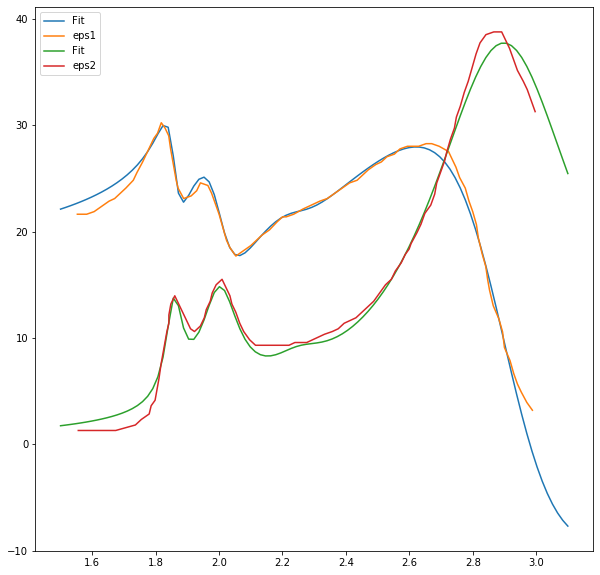

In [2]:
#Drude Lorentz Oscillator model 

def LorentzOsc(w,w0,wp,g):
    return wp**2/(w0**2 -w**2 -1j*g*w)

w01 = 18143/8065.54429
w02 = 23495/8065.54429
w03 = 14991/8065.54429
w04 = 16155/8065.54429

wp1 = 8475.5/8065.54429
wp2 = 64293/8065.54429
wp3 = 8321.6/8065.54429
wp4 = 14315/8065.54429

g1 = 1858.7/8065.54429
g2 = 4688.9/8065.54429
g3 = 519.72/8065.54429
g4 = 1201.6/8065.54429


eps_inf = 9.1
w = np.linspace(1.5,3.1,100)

eps = eps_inf + LorentzOsc(w,w01,wp1,g1) + LorentzOsc(w,w02,wp2,g2) + LorentzOsc(w,w03,wp3,g3) + + LorentzOsc(w,w04,wp4,g4)

plt.figure(figsize=(10,10))
plt.plot(w,np.real(eps),label = 'Fit')
plt.plot(eps1[:,0],eps1[:,1],label ='eps1')
plt.plot(w,np.imag(eps),label = 'Fit')
plt.plot(eps2[:,0],eps2[:,1],label ='eps2')
plt.legend()
plt.show()



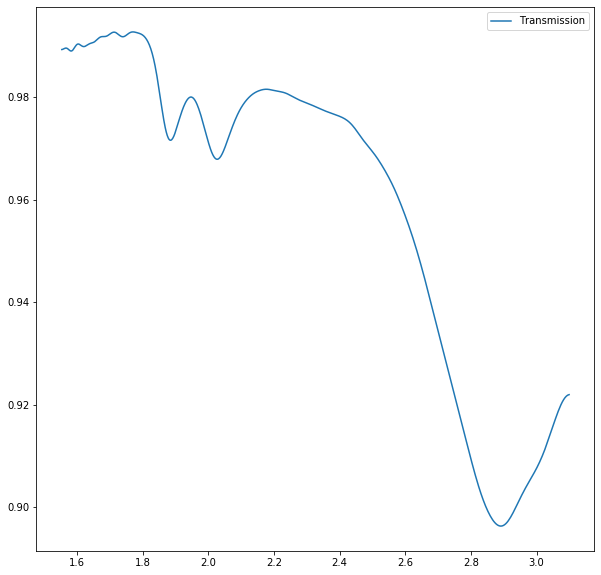

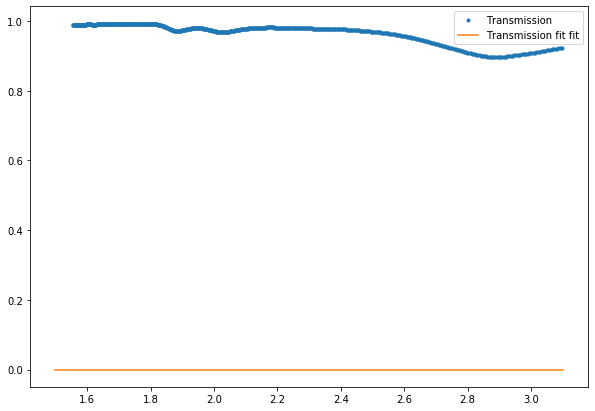

NameError: name 'S_SI' is not defined

<Figure size 432x288 with 0 Axes>

In [7]:
a_static = np.loadtxt('absorption_pristine.txt',delimiter = '\t')

a_static[:,0] = a_static[:,0]
a_static[:,1] = 1 - a_static[:,1]

a_static[:,1]=scipy.ndimage.filters.gaussian_filter(a_static[:,1],sigma=10)


plt.figure(figsize=(10,10))
plt.plot(a_static[:,0],a_static[:,1],label = 'Transmission')
plt.legend()
plt.show()


def T_monolayer(w,ns,eps1,eps2,d):
    return (4*ns)/((1+ns+(w*d*eps2)/c)**2 + (w*d*(eps1 -1)/c)**2) 

ns = 1
d = 12.6

plt.figure(figsize=(10,7))
plt.plot(a_static[:,0],a_static[:,1],'.',label = 'Transmission')
plt.plot(w,T_monolayer(w*e/h,ns,np.real(eps),np.imag(eps),d),label = 'Transmission fit fit')
plt.legend()
plt.show()

S_atomic = ((w*e/h*d*np.imag(eps))/c)**2

plt.figure()
plt.plot(S_SI/S_atomic)
plt.plot()


plt.figure()
plt.plot(T_SI/T_atomic)
plt.plot()

In [51]:
#KKR Time to get k as function of time


def KKRer(n):
    
    #Making 3D isotropic fake matrix

    a = np.zeros(9*np.shape(n)[0])
    a = np.asarray(a)
    a = np.reshape(a,(np.shape(n)[0],3,3))

    ax = np.zeros(9*np.shape(n)[0])
    ax = np.asarray(ax)
    ax = np.reshape(ax,(np.shape(n)[0],3,3))

    ay = np.zeros(9*np.shape(n)[0])
    ay = np.asarray(ay)
    ay = np.reshape(ay,(np.shape(n)[0],3,3))

    az = np.zeros(9*np.shape(n)[0])
    az = np.asarray(az)
    az = np.reshape(az,(np.shape(n)[0],3,3))


    i=0
    j=0
    k=0
    while i < np.shape(n)[0]:
        ax[i] =np.diag([1,0,0])*n[i]
        i=i+1


    while j < np.shape(n)[0]:
        ay[j] = np.diag([0,1,0])*n[j]
        j=j+1


    while k < np.shape(n)[0]:
        az[k] = np.diag([0,0,1])*n[k]
        k=k+1


    a=ax+ay+az


    #KKR Function

    def kkr(de, eps_imag, cshift=1e-6):
        eps_imag = np.array(eps_imag)
        nedos = eps_imag.shape[0]
        cshift = complex(0, cshift)
        w_i = np.arange(0, nedos*de, de, dtype=np.complex_)
        w_i = np.reshape(w_i, (nedos, 1, 1))

        def integration_element(w_r):
            factor = w_i / (w_i**2 - w_r**2 + cshift)
            total = np.sum(eps_imag * factor, axis=0)
            return total * (2/math.pi) * de + np.diag([1, 1, 1])

        return np.real([integration_element(w_r) for w_r in w_i[:,0,0]])



    RI = kkr(5/1000,a,1e-10)

    RI = RI[:,0,0]   
    
    
    return(RI)





In [61]:
1.5*e/(h/(2*np.pi))*.67e-9/3e8

0.00508729203119072

In [64]:
1.5*3.67e-2 *12.6 /137

0.005062992700729927